<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Import-Datasets" data-toc-modified-id="Import-Datasets-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Datasets</a></span></li><li><span><a href="#Visualize-the-Images" data-toc-modified-id="Visualize-the-Images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the Images</a></span></li><li><span><a href="#Detect-Humans" data-toc-modified-id="Detect-Humans-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Detect Humans</a></span><ul class="toc-item"><li><span><a href="#OpenCV-haarcascade_frontalface_alt.xml" data-toc-modified-id="OpenCV-haarcascade_frontalface_alt.xml-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>OpenCV haarcascade_frontalface_alt.xml</a></span></li><li><span><a href="#Human-Face-Detector-Function" data-toc-modified-id="Human-Face-Detector-Function-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Human Face Detector Function</a></span></li></ul></li><li><span><a href="#Detect-Dogs" data-toc-modified-id="Detect-Dogs-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Detect Dogs</a></span><ul class="toc-item"><li><span><a href="#Pre-trained-VGG-16-Model" data-toc-modified-id="Pre-trained-VGG-16-Model-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pre-trained VGG-16 Model</a></span></li><li><span><a href="#VGG-16-Predict-Function" data-toc-modified-id="VGG-16-Predict-Function-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>VGG-16 Predict Function</a></span></li><li><span><a href="#Dog-Detection-Function" data-toc-modified-id="Dog-Detection-Function-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Dog Detection Function</a></span></li></ul></li><li><span><a href="#CNN-to-Classify-Dog-Breeds" data-toc-modified-id="CNN-to-Classify-Dog-Breeds-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>CNN to Classify Dog Breeds</a></span></li></ul></div>

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans


# Libraries

In [64]:
import numpy as np
from glob import glob

import cv2  # computer vision library               
import matplotlib.pyplot as plt                        
%matplotlib inline   

from tqdm import tqdm

# PyTorch Framework for Deep Learning
import torch
import torchvision.models as models # pre-trained nets
import torchvision.transforms as transforms # image transformations for processing

# Pillow Image
from PIL import Image

ModuleNotFoundError: No module named 'Image'

---
<a id='step0'></a>
# Import Datasets

Downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `data/dogs`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `data/people`.  

Save the file paths for both the human dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [3]:
# load filenames for human and dog images
human_files = np.array(glob("data/people/*/*"))
dog_files = np.array(glob("data/dogs/*/*/*"))

In [4]:
# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


# Visualize the Images

Example Human Image: 


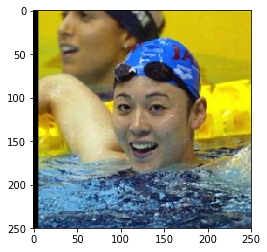

Image Size: 
(250, 250, 3)


In [32]:
idx_human = np.random.randint(0, high=len(human_files))

img = cv2.imread(human_files[idx_human])

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('Example Human Image: ')
plt.imshow(cv_rgb)
plt.show()

print('Image Size: ')
print(cv_rgb.shape)

Example Dog Image: 
Image Size: 
(408, 393, 3)


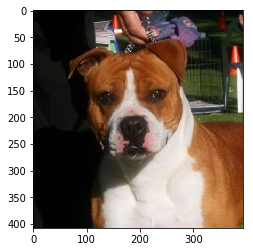

In [33]:
idx_dog = np.random.randint(0, high=len(dog_files))

img = cv2.imread(dog_files[idx_dog])

# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

print('Example Dog Image: ')
plt.imshow(cv_rgb)

print('Image Size: ')
print(cv_rgb.shape)

<a id='step1'></a>
#  Detect Humans

OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  Downloaded one of these detectors and store it in the `haarcascades` directory.  

## OpenCV haarcascade_frontalface_alt.xml

Number of faces detected: 1


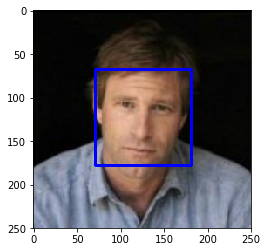

In [5]:
# Apply the Face Detector to one of the Himages in the people data set

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])

# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.



## Human Face Detector Function

In [108]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray) # numpy array of detected faces
    
    return len(faces) > 0

In [7]:
# test face_detector()

# grab the first 100 files just to test
human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

# Run the face_detector function on all human & dog files
# store the outputs as 1s, 0s and not booleans for easier performance calculations
human_performance = [int(face_detector(f)) for f in human_files_short]
dog_performance = [int(face_detector(f)) for f in dog_files_short]

# Compute & Print the percentage of faces found for each
print('Percentage of faces detected in human files: ' + str(sum(human_performance)/len(human_performance)))
print('Percentage of faces detected in dog files: ' + str(sum(dog_performance)/len(dog_performance)))

Percentage of faces detected in human files: 0.96
Percentage of faces detected in dog files: 0.18


# Detect Dogs

## Pre-trained VGG-16 Model
[VGG-16 model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  The model was trained using [ImageNet](http://www.image-net.org/), which has over 14 million images that belong to one of [1000 different categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).

In [8]:
# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

## VGG-16 Predict Function

[From the PyTorch Documentation](https://pytorch.org/docs/stable/torchvision/models.html):

All pre-trained models expect input images normalized in the same way, i.e. mini-batches of 3-channel RGB images of shape (3 x H x W), where H and W are expected to be at least 224. The images have to be loaded in to a range of [0, 1] and then normalized using mean = [0.485, 0.456, 0.406] and std = [0.229, 0.224, 0.225]

In [67]:
# helper scale function
def scale(x, feature_range=(0, 1)):
    ''' Scale takes in an image x and returns that image, scaled
       with a feature_range of pixel values from -1 to 1. 
       This function assumes that the input x is already scaled from 0-1.'''
    
    # scale to feature_range and return scaled x
    oldMin, oldMax = x.min(), x.max()
    newMin, newMax = feature_range
    
    x = ((x - oldMin) / (oldMax - oldMin)) * (newMax - newMin) + newMin
    
    return x

In [119]:
# helper image loader function
def image_loader(loader, image_name):
    image = Image.open(image_name)
    image = loader(image).float()
    image = scale(image)
    image = image.clone().detach().requires_grad_(True)
    image = image.unsqueeze(0)
    return image

In [120]:
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''

    # Define the pre-processing steps
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
    
    data_transforms = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
        ])

    # load in the image
    img = image_loader(data_transforms, img_path)
    
    # set vgg16 to eval mode
    VGG16.eval()
    
    # Return the *index* of the predicted class for that image
    prediction = np.argmax(VGG16(img).detach().numpy())
    
    return prediction # predicted class index

In [121]:
# load in the dictionary to convert from index to human-readable classes
with open('imagenet1000_clsidx_to_labels.txt','r') as inf:
    idx_to_label = eval(inf.read())
    
idx_to_label[0]

'tench, Tinca tinca'

Dog Breed Prediction: Afghan hound, Afghan


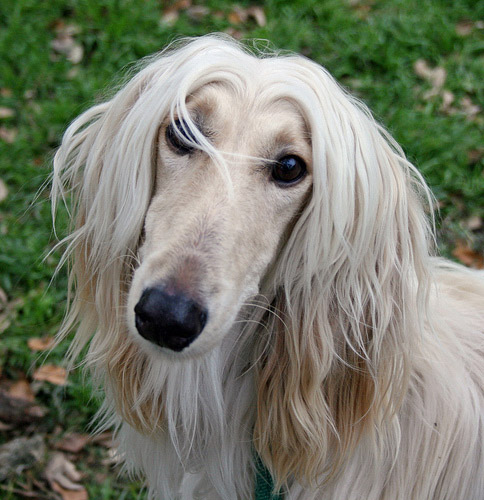

In [122]:
# Test the prediction function
pred = VGG16_predict(dog_files[8])

img_path = dog_files[8]
img = Image.open(img_path)
print('Dog Breed Prediction: ' + idx_to_label[pred])
img


## Dog Detection Function
In the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a),the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from 'Chihuahua' to 'Mexican hairless'.

In [127]:
# returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    pred = VGG16_predict(img_path)        
    return (pred >= 151) and (pred <= 268)

In [128]:
# test dog_detector()

# Run the face_detector function on all human & dog files
# store the outputs as 1s, 0s and not booleans for easier performance calculations
human_performance = [int(dog_detector(f)) for f in human_files_short]
dog_performance = [int(dog_detector(f)) for f in dog_files_short]

# Compute & Print the percentage of dogs found for each
print('Percentage of faces detected in human files: ' + str(sum(human_performance)/len(human_performance)))
print('Percentage of faces detected in dog files: ' + str(sum(dog_performance)/len(dog_performance)))

Percentage of faces detected in human files: 0.0
Percentage of faces detected in dog files: 0.95
